###Final Project Submission
    Please fill out:

    Student name:
    Student pace: self paced / part time / full time
    Scheduled project review date/time:
    Instructor name:
    Blog post URL:

In [1]:
# import the necessary packages
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

### We will import and load the dataset and view the first few rows

In [5]:
# lets import the necessary files
movie_gross_df = pd.read_csv(r'C:\Users\Nick\Desktop\Phase 2 Project\PHASE2_PROJECT-inferential-statistics-\data\bom.movie_gross.csv.gz')
rating_df = pd.read_csv(r'C:\Users\Nick\Desktop\Phase 2 Project\PHASE2_PROJECT-inferential-statistics-\data\rt.movie_info.tsv.gz', sep = '\t')
reviews_df = pd.read_csv(r'C:\Users\Nick\Desktop\Phase 2 Project\PHASE2_PROJECT-inferential-statistics-\data\rt.reviews.tsv.gz', sep = '\t', encoding = 'ISO-8859-1')
movies_df = pd.read_csv(r'C:\Users\Nick\Desktop\Phase 2 Project\PHASE2_PROJECT-inferential-statistics-\data\tmdb.movies.csv.gz')
movie_budget_df = pd.read_csv(r'C:\Users\Nick\Desktop\Phase 2 Project\PHASE2_PROJECT-inferential-statistics-\data\tn.movie_budgets.csv.gz')


In [ ]:
# We will view the first few rows of each dataframe
print(movie_gross_df.head())
print(rating_df.head())
print(reviews_df.head())
print(movies_df.head())
print(movie_budget_df.head())

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  
   id                                           synopsis rating  \
0   1  This gritty, fast-paced, and innovative police...      R   
1   3  New York City, not-too-distant-future: Eric Pa...      R   
2   5  Illeana Douglas delivers a superb performance ...      R   
3   6  Michael Douglas runs afoul of a treacherous su...      R   
4   7                                                NaN     NR   

              

In [12]:
# Lets see the shape of each dataframe
print(movie_gross_df.shape)
print(rating_df.shape)
print(reviews_df.shape)
print(movies_df.shape)
print(movie_budget_df.shape)

(2007, 5)
(1560, 12)
(54432, 8)
(26517, 10)
(5782, 6)


### Identify the missing values and decide how to handle them

In [9]:
# Check for missing values in each dataframe
print(movie_gross_df.isna().sum())
print(rating_df.isna().sum())
print(reviews_df.isna().sum())
print(movies_df.isna().sum())
print(movie_budget_df.isna().sum())

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64
id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64
id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64
Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


From the output, we can see that there are a number of missing values. some more than the others.
For the dataframe with too many missing values, we will drop them. The rest we will fill them.

In [13]:
# We will drop any rows with missing values in the movie_gross_df
movie_gross_df.dropna(inplace=True)

# We will fill missing values in the reviews dataframe with 'Unknown'
reviews_df.fillna('Unknown', inplace=True)


We still have missing values in the movie budget dataframe, but they have dollar signs and commas. 
So we need to remove them.

In [15]:
# We remove the dollar signs and commas from the production budget column and convert to numeric
movie_budget_df['production_budget'] = movie_budget_df['production_budget'].replace(r'[\$,]', '', regex=True).astype(float)

# From this we will fill the missing values with the median
movie_budget_df['production_budget'] = movie_budget_df['production_budget'].fillna(movie_budget_df['production_budget'].median())

We will do the same with the movie gross dataframe and clean the domestic box office and foreign gross columns.

In [16]:
# We will clean the domestic box office and foreign gross columns
movie_gross_df['domestic_gross'] = movie_gross_df['domestic_gross'].replace(r'[\$,]', '', regex=True).astype(float)
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].replace(r'[\$,]', '', regex=True).astype(float)

# We will fill the missing values with the median
movie_gross_df['domestic_gross'] = movie_gross_df['domestic_gross'].fillna(movie_gross_df['domestic_gross'].median())
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].fillna(movie_gross_df['foreign_gross'].median())

### Correcting Data Types

Ensuring the data types of each column are appropriate for analysis

In [17]:
# Check data types
print(movie_gross_df.dtypes)
print(rating_df.dtypes)
print(movie_budget_df.dtypes)

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object
id               int64
synopsis        object
rating          object
genre           object
director        object
writer          object
theater_date    object
dvd_date        object
currency        object
box_office      object
runtime         object
studio          object
dtype: object
id                     int64
release_date          object
movie                 object
production_budget    float64
domestic_gross        object
worldwide_gross       object
dtype: object


In [18]:
# We can see that realese date is an object datatype. We will convert this to a datetime datatype
movie_budget_df['release_date'] = pd.to_datetime(movie_budget_df['release_date'])

### Check for and Remove Duplicte Rows

In [19]:
# Check for duplicates
print(movie_gross_df.duplicated().sum())
print(rating_df.duplicated().sum())

0
0


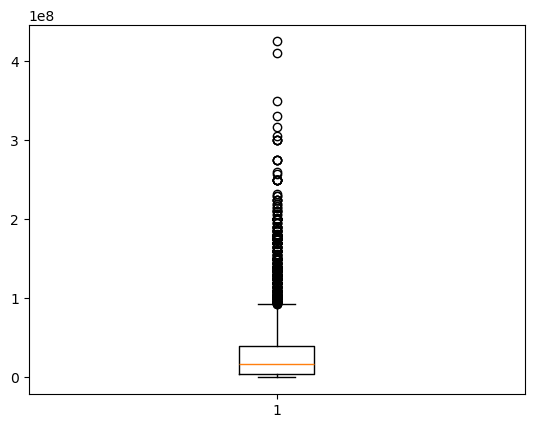

In [20]:
plt.boxplot(movie_budget_df['production_budget'])
plt.show()

In [23]:
# We'll check the columns in movie_gross_df
print(movie_gross_df.columns)

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


In [24]:
# Check if genres is in movies_df
print(movies_df.columns)

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')


In [ ]:
# Merge movie_gross_df with movies_df based on a common column. 'title' or 'movie_id
merged_df = pd.merge(movie_gross_df, movies_df[['movie_id', 'genre']], on='movie_id', how='left')

# Now you can group

In [22]:
genre_performance = movie_gross_df.groupby('genres')[['domestic_gross', 'foreign_gross']].sum()

top_genre_domestic = genre_performance.sort_values('domestic_gross', ascending=False).head(10)
top_genre_foreign = genre_performance.sort_values('foreign_gross', ascending=False).head(10)

print("Top Performing Genres Domestically:")
print(top_genre_domestic)
print("\nTop Performing Genres Internationally:")
print(top_genre_foreign)

KeyError: 'genres'